In [1]:
# Digital Classifier

In [2]:
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)
path

Path('/root/.fastai/data/mnist_sample')

In [4]:
Path.BASE_PATH = path

In [5]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [6]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

In [7]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [8]:
#Below uses Python Imaging Library (PIL)

im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [9]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [10]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [11]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:26,4:23])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')
                           

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0,0


In [12]:
#testing out the mean of a tensor
im3_t.double().mean()

tensor(36.3074, dtype=torch.float64)

In [13]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

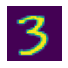

In [14]:
show_image(three_tensors[1]);

In [15]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

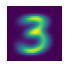

In [16]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

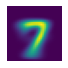

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

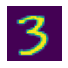

In [18]:
a_3 = stacked_threes[1]
show_image(a_3);

In [19]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [20]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [21]:
#F is the same as from pytorch import torch.mn.functional as F
#This is already done as F in fastai
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [22]:
#quick summary of what we can do with a tensor:
#all basic math operations
#we can also pick out specific rows and columns. e.g [2,3:4] -> row 3, col 4
#we can also find the type and change the type of a tensor

In [23]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

In [24]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [25]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [26]:
#below is an example of broadcasting as valid_3_tens has a rank3 vs mean3 a rank2
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1520, 0.1126, 0.1599,  ..., 0.1176, 0.1272, 0.1109]),
 torch.Size([1010]))

In [27]:
valid_3_tens.shape, mean3.shape

(torch.Size([1010, 28, 28]), torch.Size([28, 28]))

In [28]:
(valid_3_tens - mean3).shape

torch.Size([1010, 28, 28])

In [29]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [30]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [31]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = 1 - is_3(valid_7_tens).float().mean()
               
accuracy_3s, accuracy_7s               

(tensor(0.9168), tensor(0.9854))

# Stochastic Gradient

In [32]:
def f(x): return x**2

In [33]:
xt = tensor(3.).requires_grad_()

In [34]:
xt

tensor(3., requires_grad=True)

In [35]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [36]:
yt.backward()

In [37]:
xt.grad

tensor(6.)

In [38]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [39]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [40]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

# End to End SGD Example

In [41]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

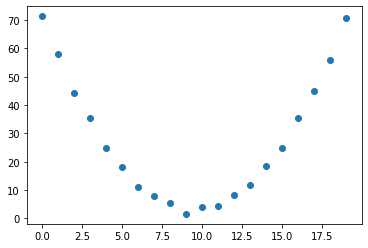

In [42]:
speed = torch.rand(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [43]:
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

In [44]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

def mse(preds, targets): return ((preds-targets)**2).mean()


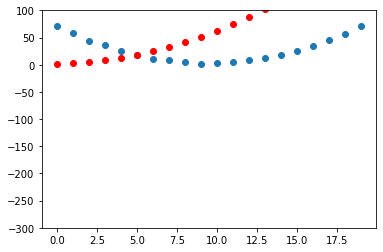

In [45]:
preds = f(time, params)

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)
    
show_preds(preds)


In [46]:
loss = mse(preds, speed)
loss

tensor(6271.1558, grad_fn=<MeanBackward0>)

In [47]:
loss.backward()
params.grad

tensor([25124.4727,  1624.3723,    94.0216])

In [48]:
params.grad * 1e-5

tensor([0.2512, 0.0162, 0.0009])

In [49]:
params

tensor([0.5349, 0.8094, 1.1103], requires_grad=True)

In [50]:
 params.grad.data

tensor([25124.4727,  1624.3723,    94.0216])

In [51]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [52]:
preds = f(time,params)
mse(preds, speed)

tensor(1722.9987, grad_fn=<MeanBackward0>)

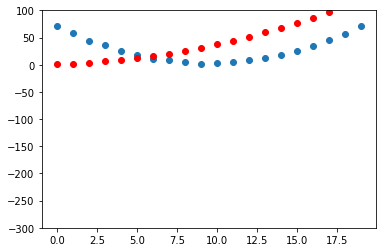

In [53]:
show_preds(preds)

In [54]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    print(params)
    return preds

In [55]:
for i in range(10): apply_step(params)

1722.9986572265625
tensor([0.1744, 0.7860, 1.1090], requires_grad=True)
862.3447265625
tensor([0.1268, 0.7828, 1.1090], requires_grad=True)
699.4794311523438
tensor([0.1062, 0.7814, 1.1091], requires_grad=True)
668.6570434570312
tensor([0.0972, 0.7807, 1.1092], requires_grad=True)
662.8212890625
tensor([0.0933, 0.7803, 1.1093], requires_grad=True)
661.7135620117188
tensor([0.0916, 0.7801, 1.1095], requires_grad=True)
661.5006103515625
tensor([0.0908, 0.7799, 1.1096], requires_grad=True)
661.4569091796875
tensor([0.0905, 0.7798, 1.1098], requires_grad=True)
661.4454345703125
tensor([0.0904, 0.7796, 1.1100], requires_grad=True)
661.4398803710938
tensor([0.0903, 0.7795, 1.1101], requires_grad=True)


In [56]:
params = orig_params.detach().requires_grad_()

tensor([0.2837, 0.7931, 1.1094], requires_grad=True)
tensor([0.1744, 0.7860, 1.1090], requires_grad=True)
tensor([0.1268, 0.7828, 1.1090], requires_grad=True)
tensor([0.1062, 0.7814, 1.1091], requires_grad=True)


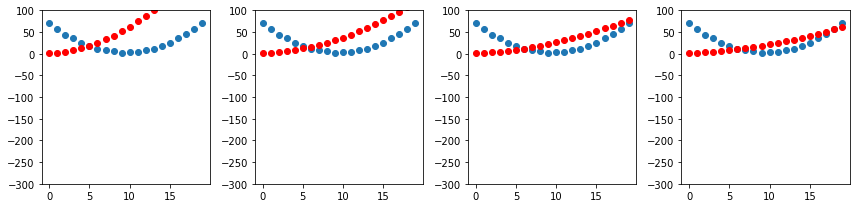

In [57]:
_, axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [58]:
orig_params

tensor([0.1062, 0.7814, 1.1091], grad_fn=<CloneBackward0>)

# Back to the MNIST dataset

In [59]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [60]:
train_x.shape

torch.Size([12396, 784])

In [61]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [62]:
train_y.shape

torch.Size([12396, 1])

In [63]:
dset = list(zip(train

SyntaxError: unexpected EOF while parsing (3816557866.py, line 1)